In [1]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 921.5 kB/s eta 0:00:00a 0:00:01


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import subprocess
subprocess.run('conda install -c conda-forge r-base', shell=True)

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - r-base


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    binutils_impl_linux-64-2.39|       h6ceecb4_0        12.4 MB  conda-forge
    bwidget-1.9.14             |       ha770c72_1         120 KB  conda-forge
    curl-7.84.0                |       h5eee18b_0          79 KB
    gcc_impl_linux-64-11.2.0   |       h1234567_1        22.2 MB
    gfortran_impl_linux-64-11.2.0|       h1234567_1        10.2 MB
    gsl-2.7                    |       he838d99_0         3.2 MB  conda-forge
    gxx_impl_linux-64-11.2.0   |       h1234567_1        10.6 MB
    kernel-headers_linux-64-2.6.32|      he073ed8_15         707 KB  conda-forge
    ld_impl_linux-64-2.39      |       hc81fddc_0         759 KB

CompletedProcess(args='conda install -c conda-forge r-base', returncode=0)

In [4]:
pip install rpy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 873.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.5-cp37-cp37m-linux_x86_64.whl size=374066 sha256=06f4b7f8b90154415dc44ff7b5664deffa9442b42c62920ab542ae0000cd09a6
  Stored in directory: /root/.cache/pip/wheels/fe/0b/90/67320a4d24c1648eb2b4f613fbd65684bb1c9b5d85978d3927
Successfully built rpy2
Note: you may need to restart the kernel to use updated packages.


In [5]:
from rpy2.robjects import r

In [6]:
pip install caret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**Python 包**

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.imputation import MeanMedianImputer

import statsmodels.api as sm
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**R 包**

In [8]:
from rpy2.robjects.packages import importr
# imports the base module for R.
base = importr("base")
 
# imports the utils package for R.
utils = importr("utils")

#ti = importr('tidyverse')
#importr('caret')
#importr('leaps')

**数据基本情况检查**

In [9]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
pd.DataFrame(data = [train.isna().sum()/train.shape[0]*100, test.isna().sum()/test.shape[0]*100], 
             index=["Train Null (%)", "Test Null (%)"]).T.style.background_gradient(cmap='summer_r')

,Train Null (%),Test Null (%)
Id,0.000000,0.000000
MSSubClass,0.000000,0.000000
MSZoning,0.000000,0.274160
LotFrontage,17.739726,15.558602
LotArea,0.000000,0.000000
Street,0.000000,0.000000
Alley,93.767123,92.666210
LotShape,0.000000,0.000000
LandContour,0.000000,0.000000
Utilities,0.000000,0.137080


In [11]:
train_data = train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis = 1)
test_data = test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis = 1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


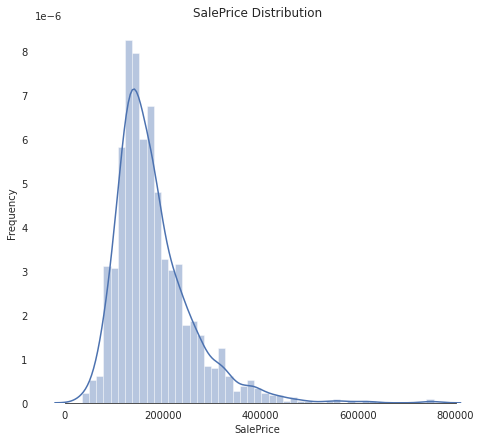

In [12]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'], color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice Distribution")
sns.despine(trim=True, left=True)
plt.show()

In [13]:
# 斜度 和 曲度
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


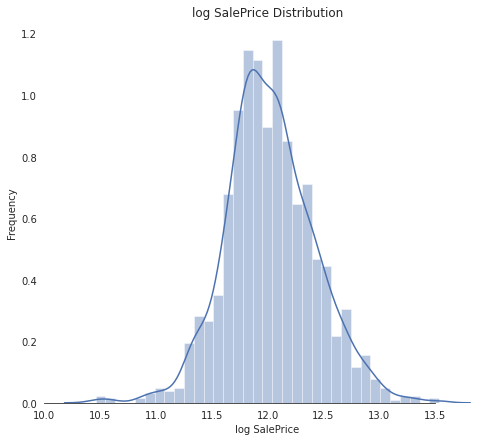

In [14]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(np.log(train['SalePrice']), color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="log SalePrice")
ax.set(title="log SalePrice Distribution")
sns.despine(trim=True, left=True)
plt.show()

In [15]:
# 斜度 和 曲度
print("Skewness: %f" % np.log(train['SalePrice']).skew())
print("Kurtosis: %f" % np.log(train['SalePrice']).kurt())

Skewness: 0.121335
Kurtosis: 0.809532


**所以我们考虑对lnY回归**

In [16]:
# Finding numeric features
# 这样分出来的不全是数值型的
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = []
cat = []
for i in train_data.columns:
    if (train_data[i].dtype in numeric_dtypes)&(i != 'SalePrice'):
            num.append(i)  
    elif i != 'SalePrice': #elif train_data[i].dtype=='object'
            cat.append(i) 

In [17]:
#对num、cat进行人工校对,可能还有那天晚上后来没注意了
change = ['MSSubClass','OverallQual']
for c in change:
    num.remove(c)
    cat.insert(-1,c)

**各变量分布情况**

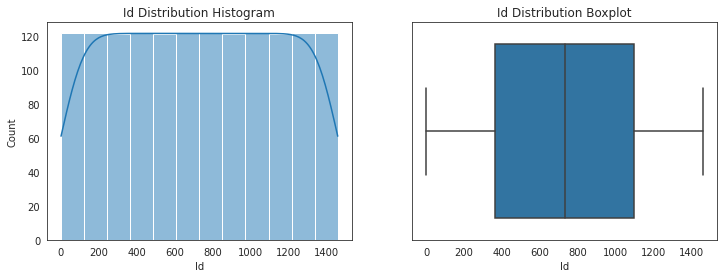

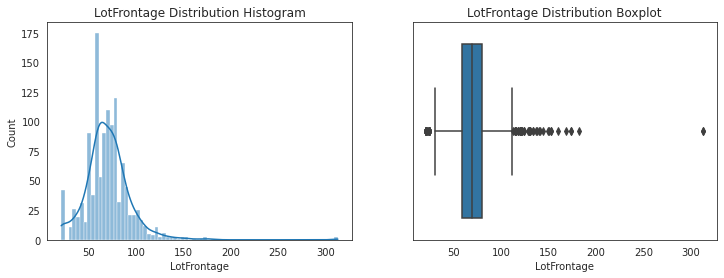

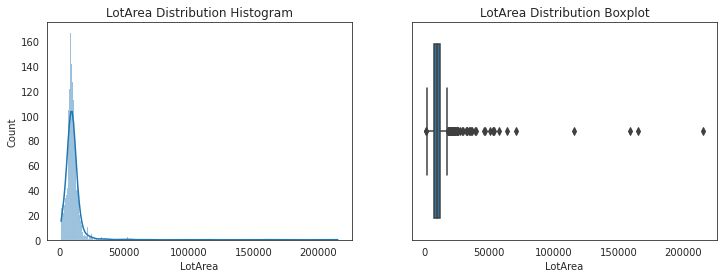

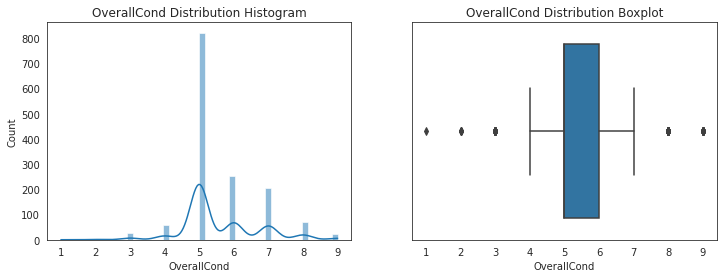

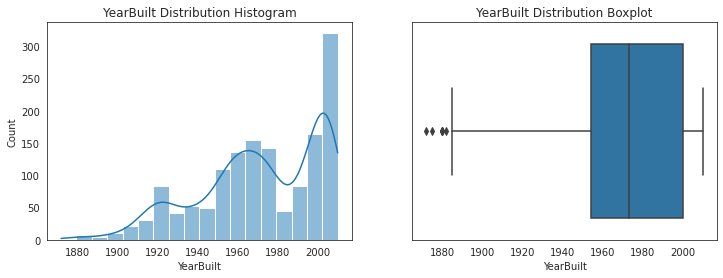

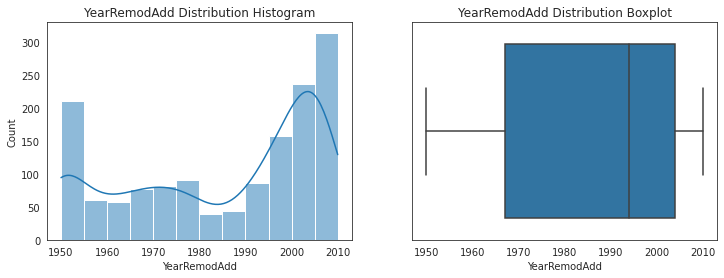

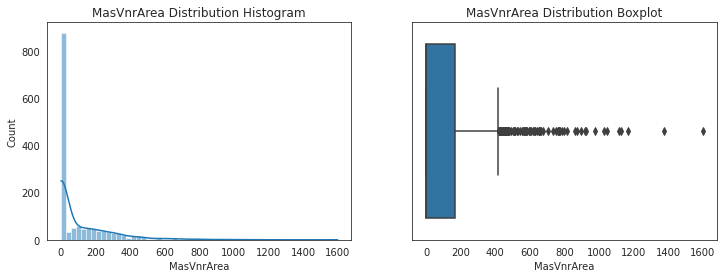

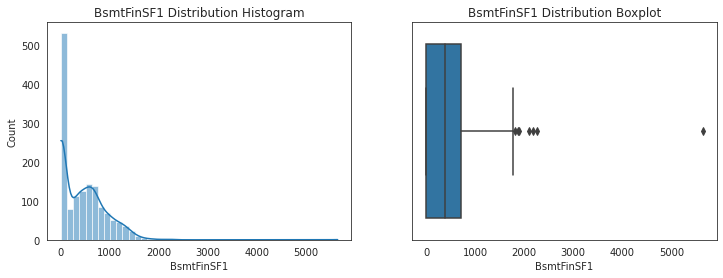

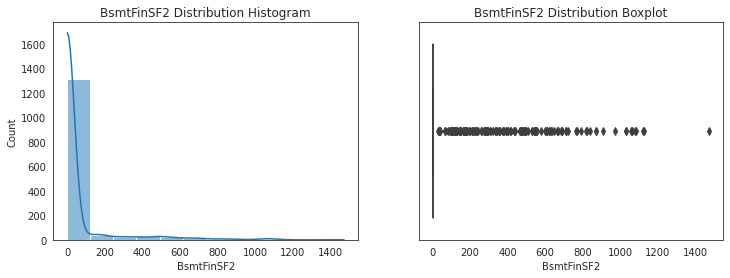

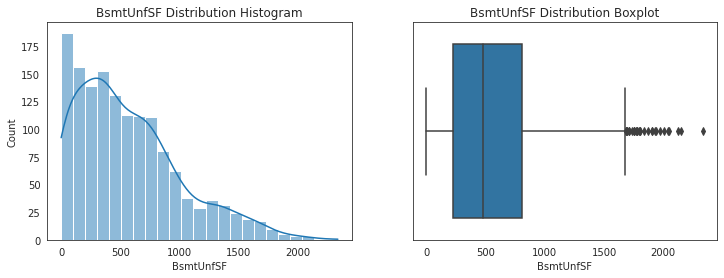

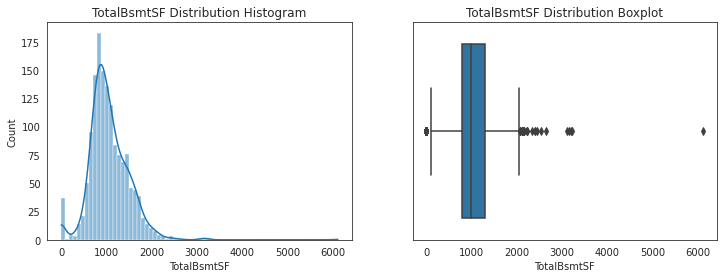

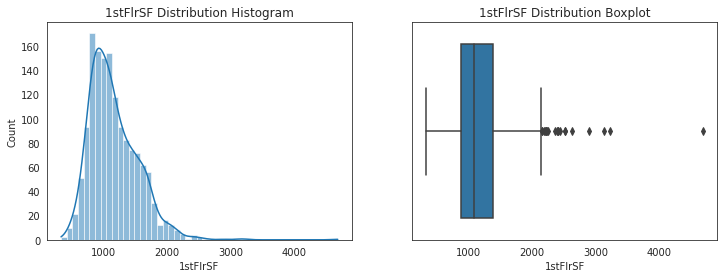

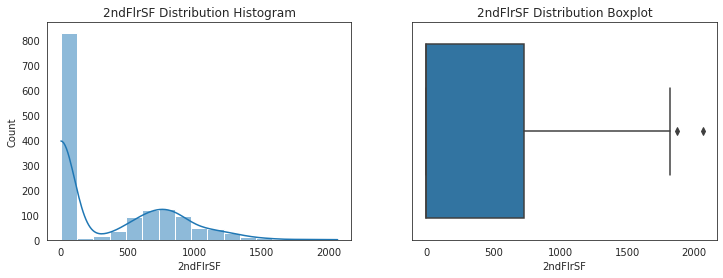

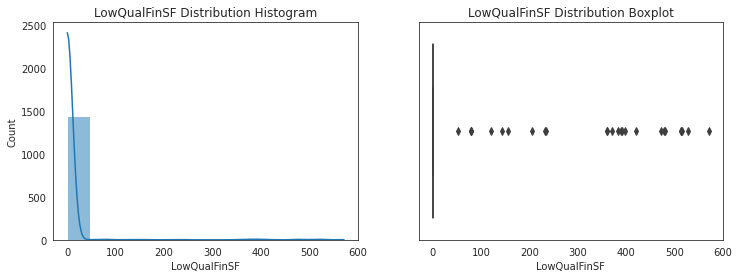

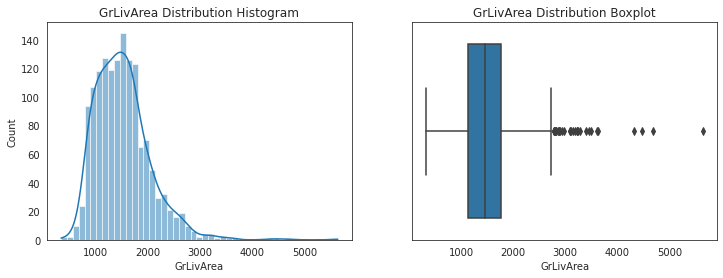

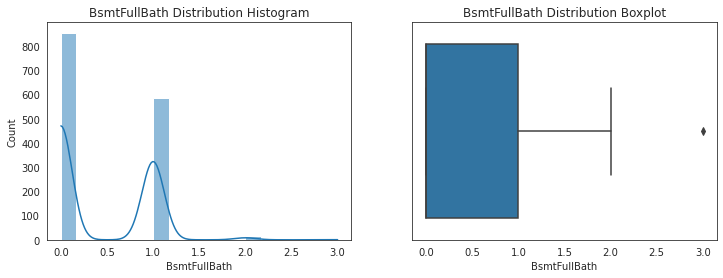

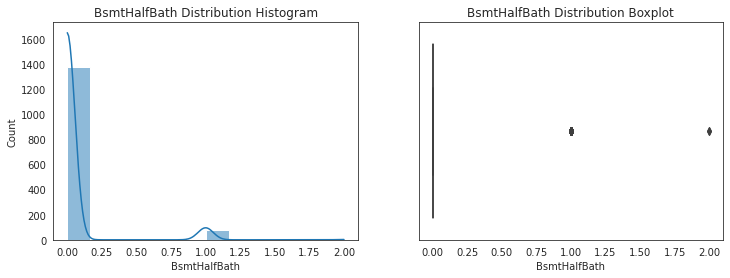

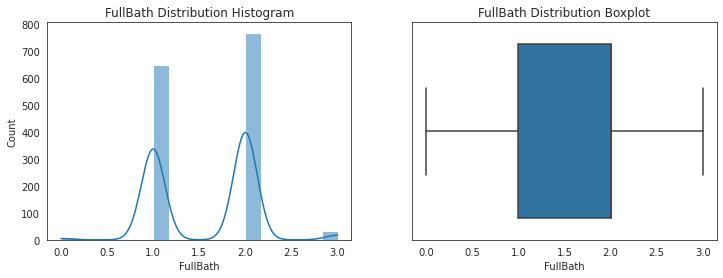

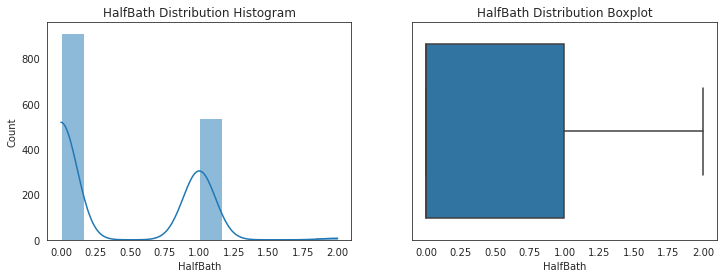

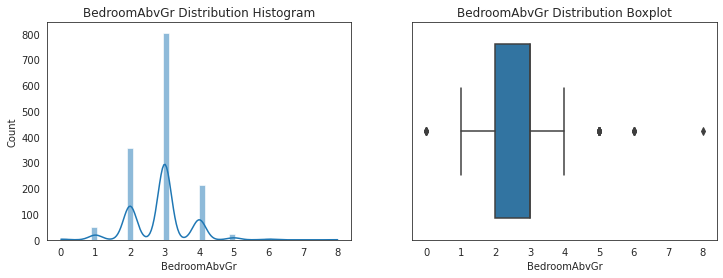

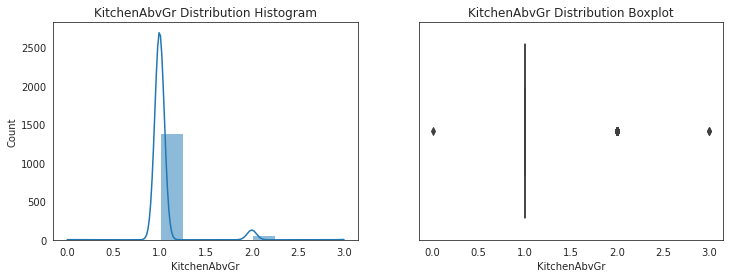

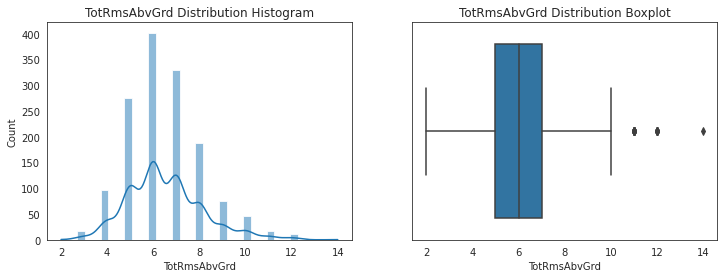

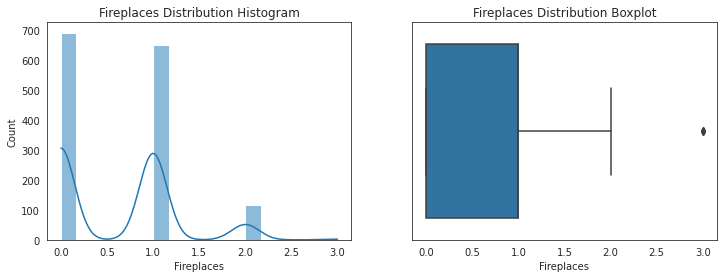

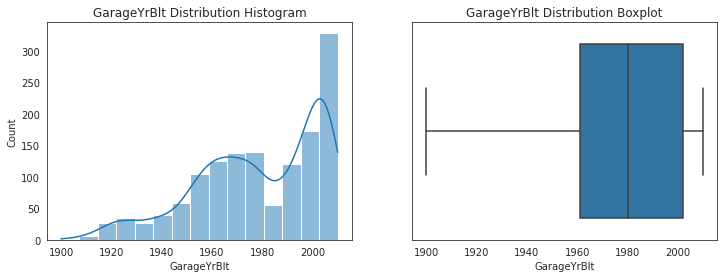

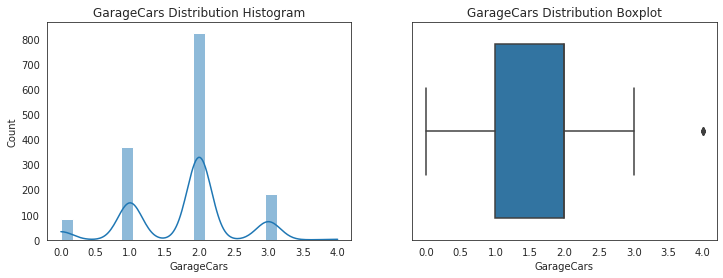

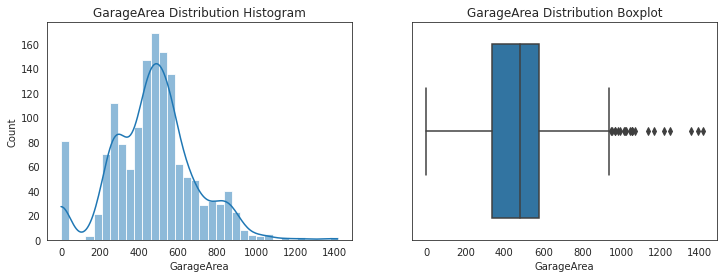

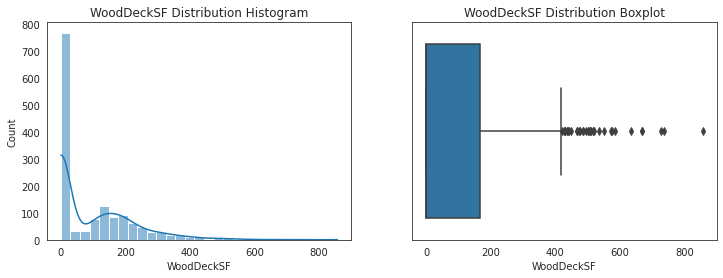

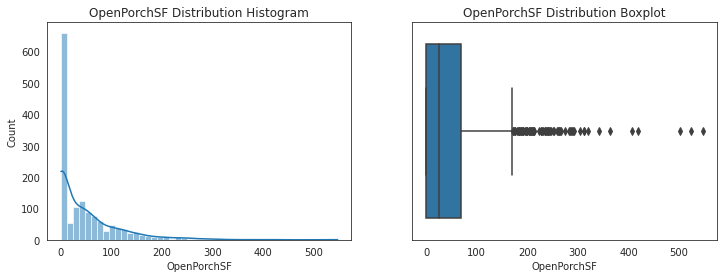

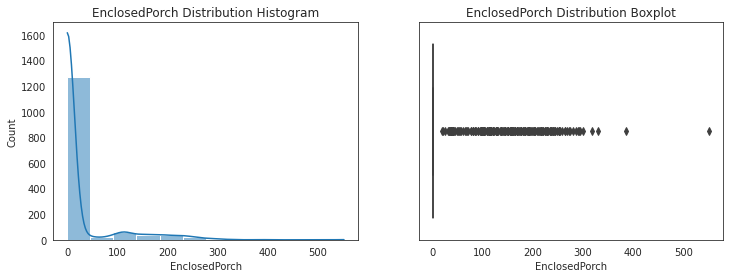

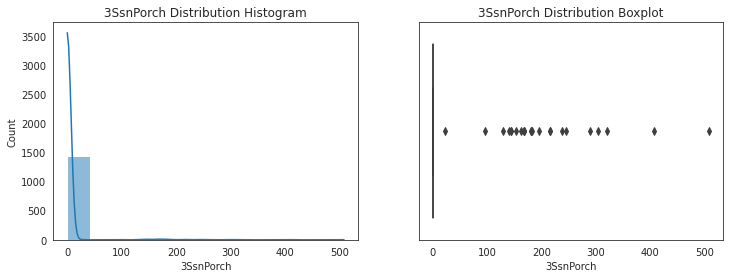

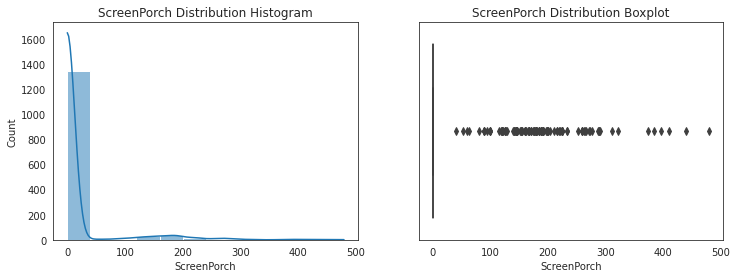

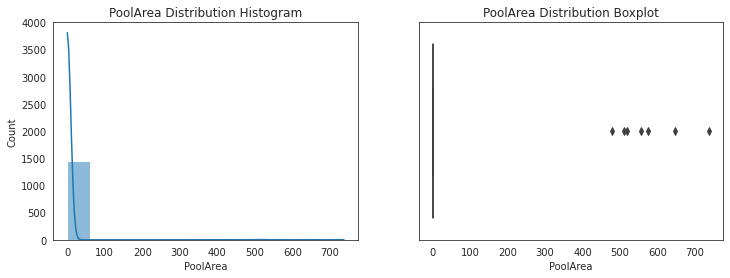

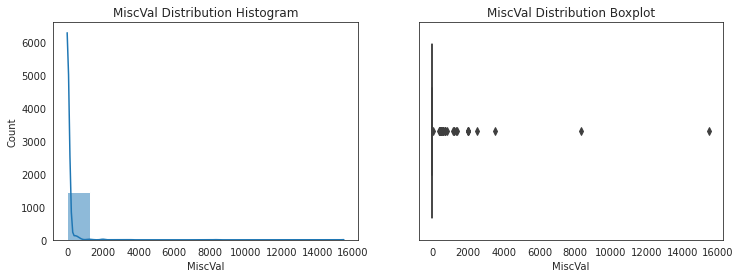

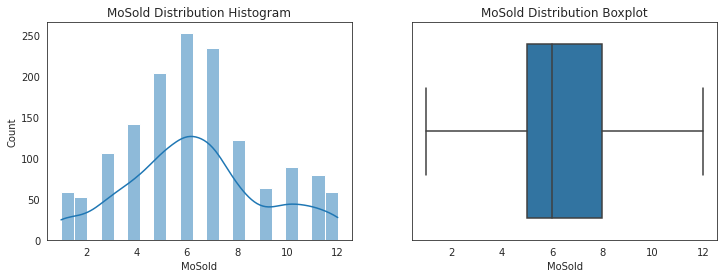

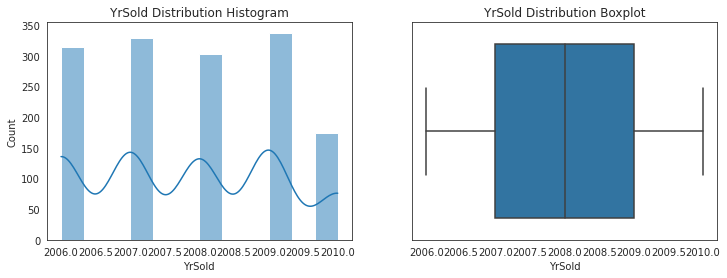

In [18]:
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()
for var in num:
    num_dist(train, var)

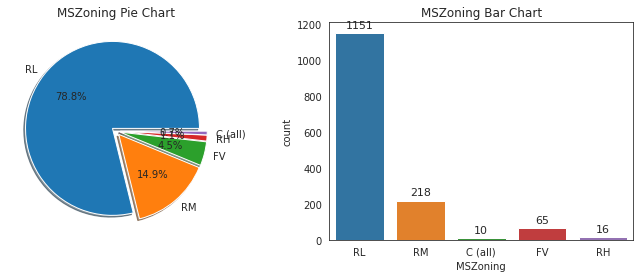

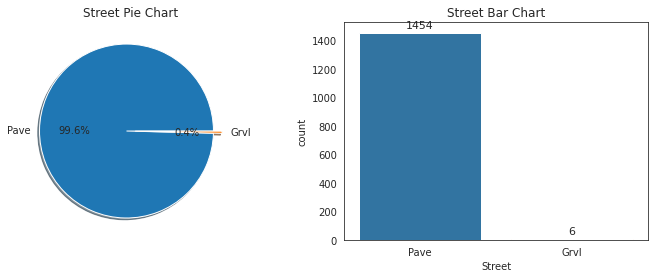

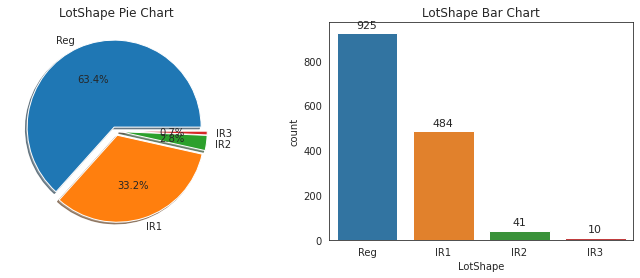

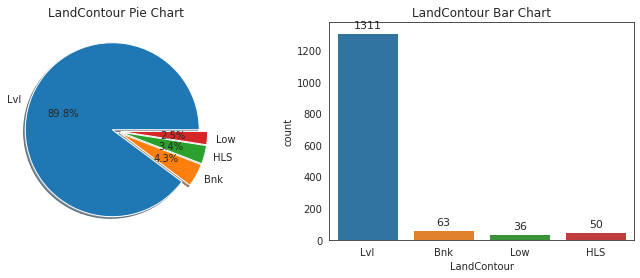

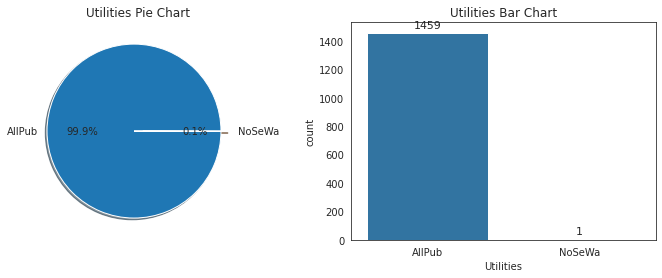

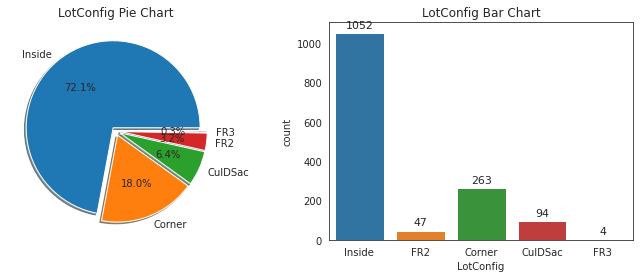

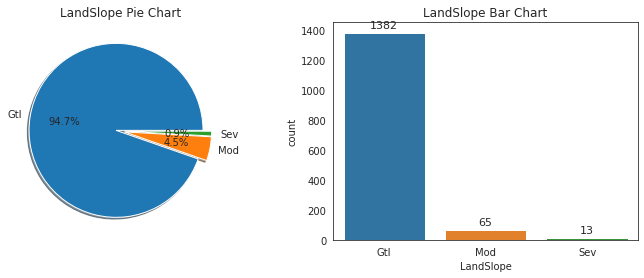

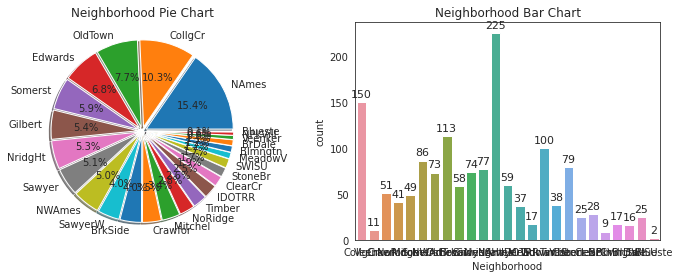

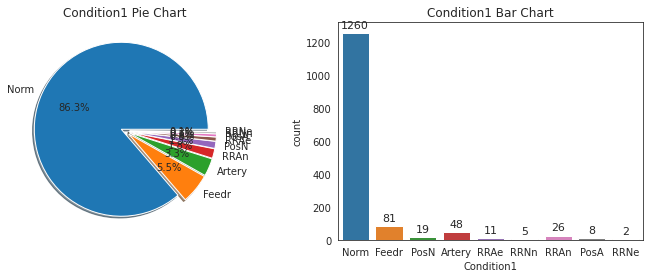

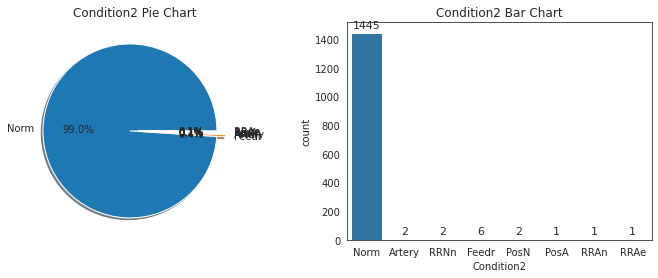

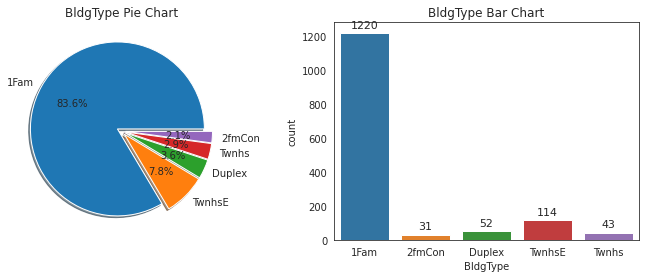

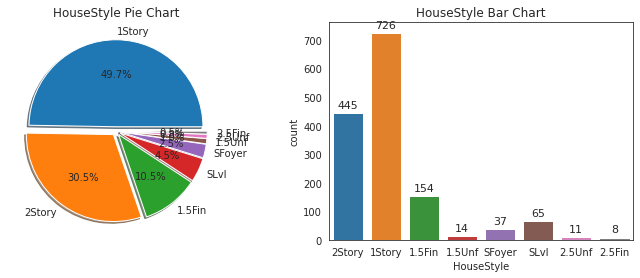

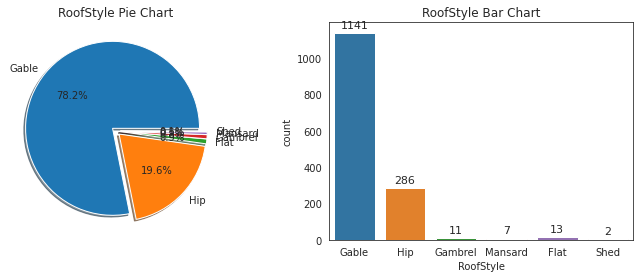

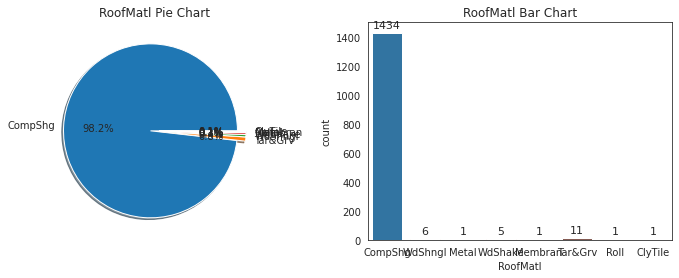

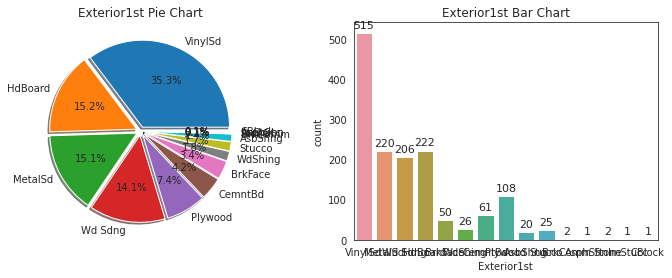

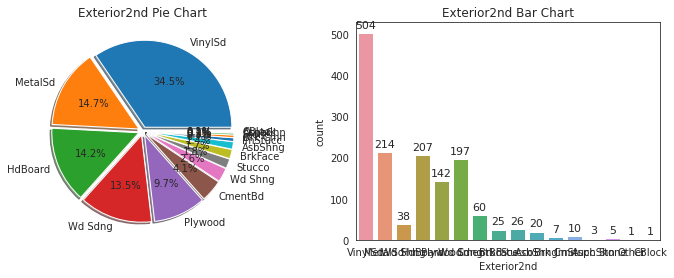

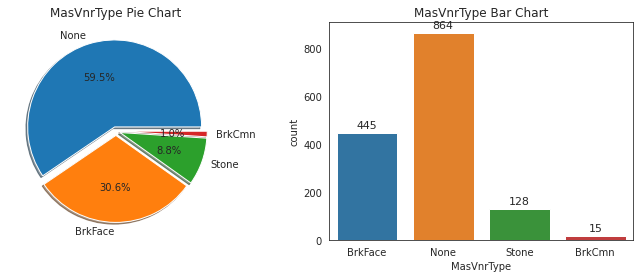

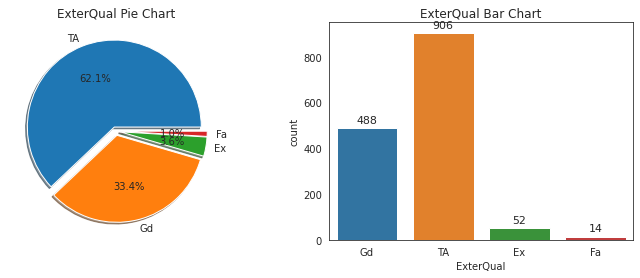

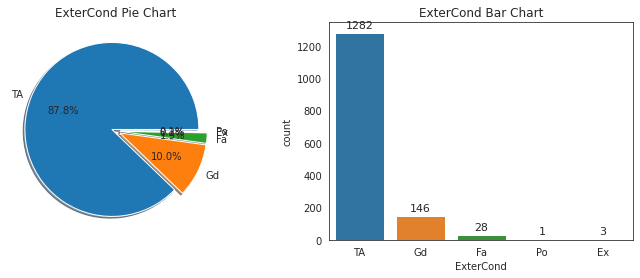

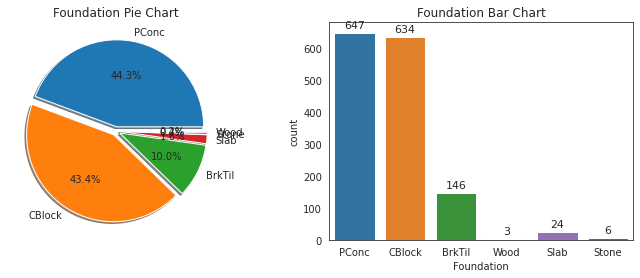

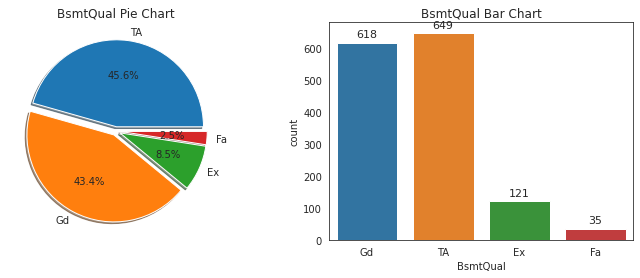

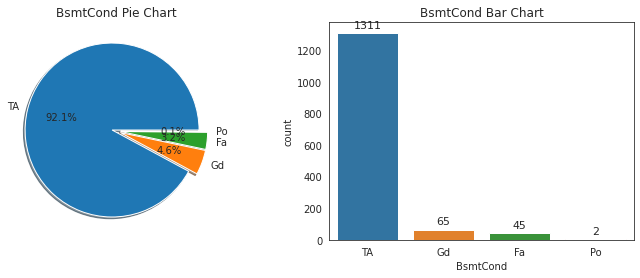

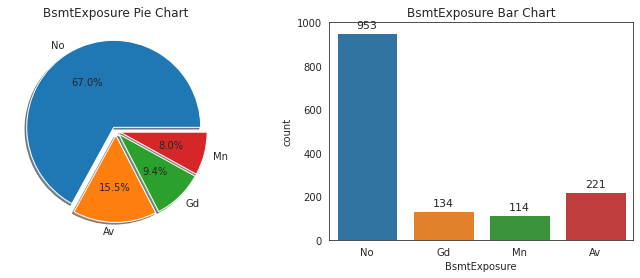

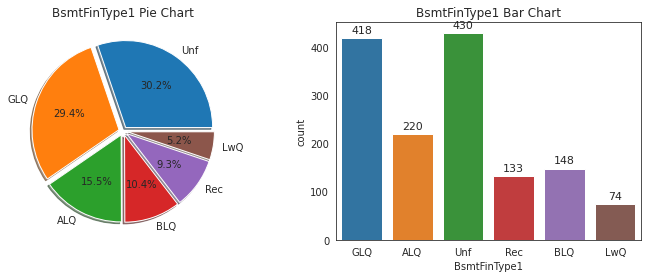

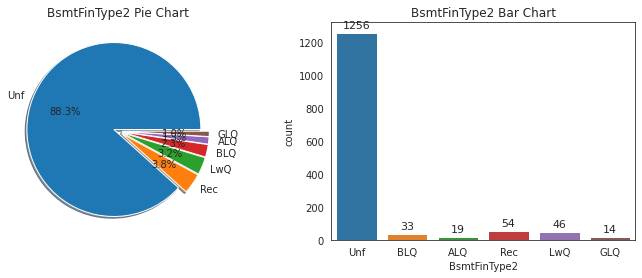

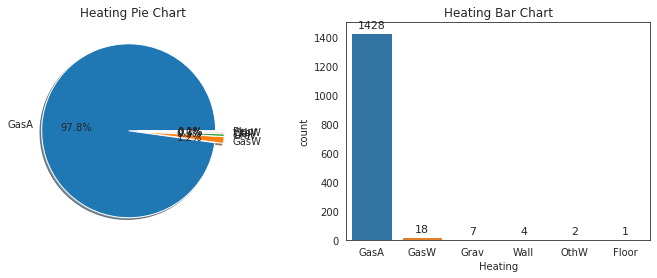

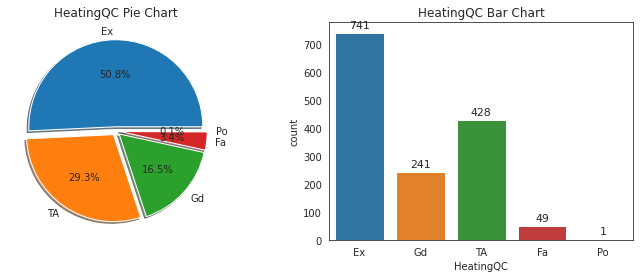

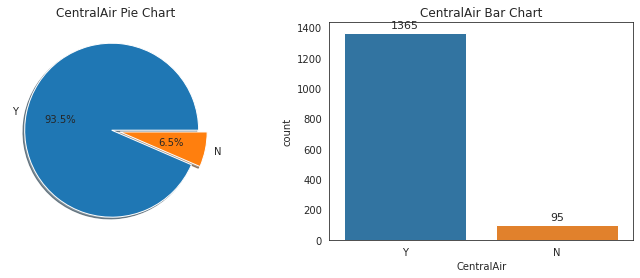

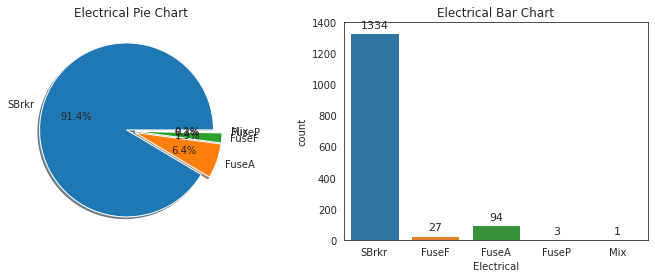

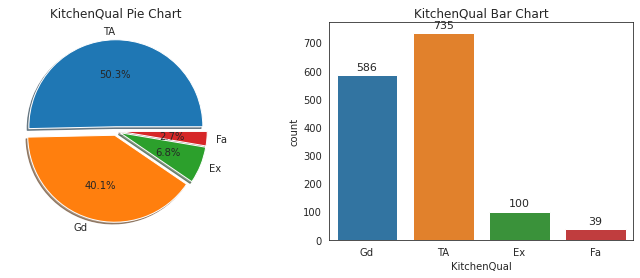

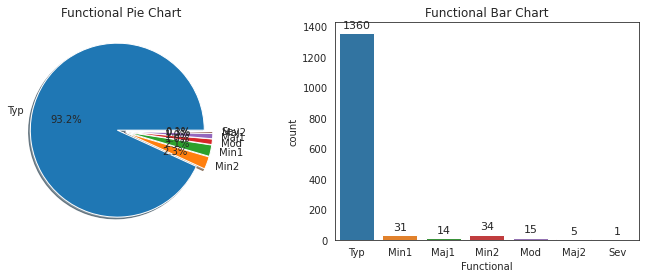

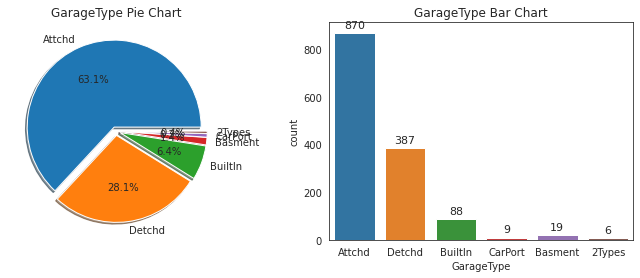

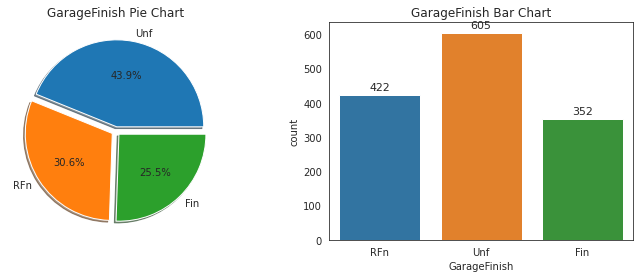

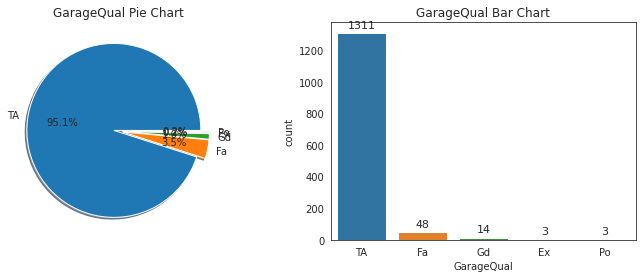

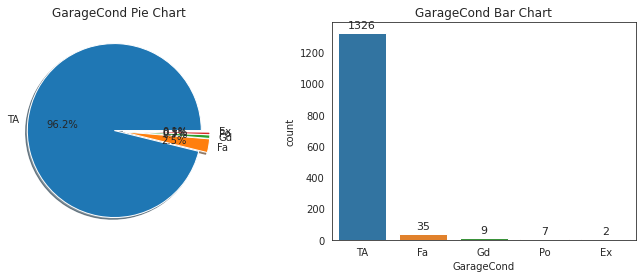

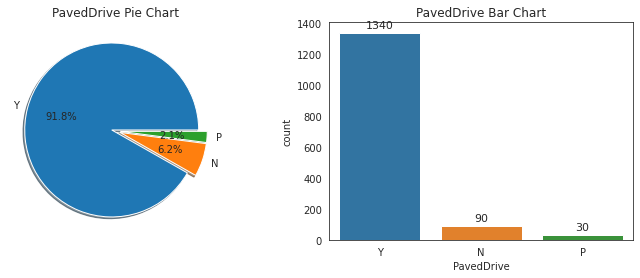

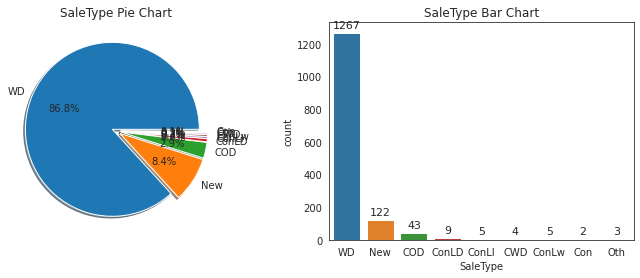

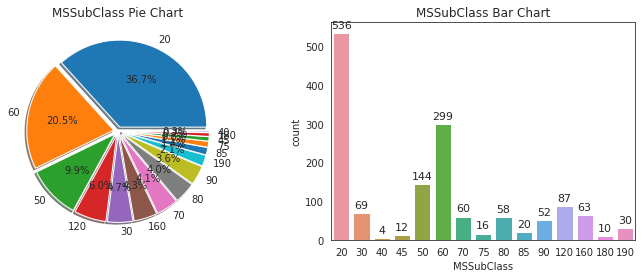

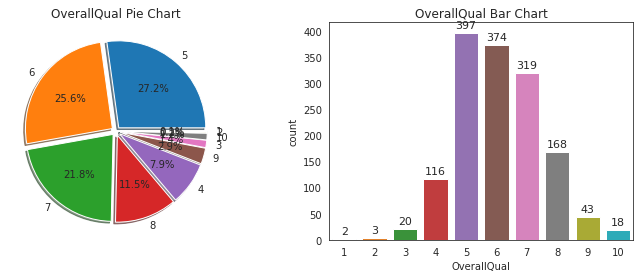

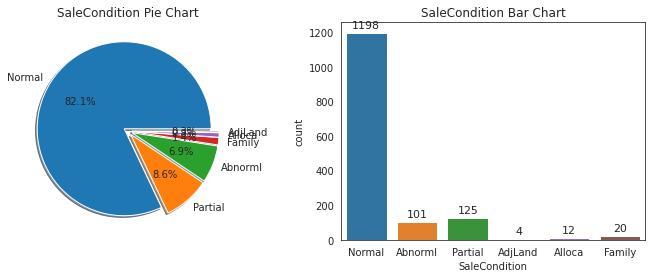

In [19]:
def cat_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    train_data[var].value_counts().plot(kind="pie", explode=[0.05 for x in data[var].dropna().unique()], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f"{var} Pie Chart")
    ax[0].set_ylabel('')

    count = sns.countplot(x=var, data=train_data, ax=ax[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
    ax[1].set_title(f"{var} Bar Chart")
    plt.show()

for c in cat:
    cat_dist(train,c)


**缺失值补齐**

https://www.kaggle.com/code/dansbecker/handling-missing-values

连续型：

1. 缺失值占比很少很少的用平均值或者中位数？？？0%~10% sklearn.impute.SimpleImputer

2. 缺失值稍微大的用????  10%以上的50%以下的

3. 50%以上的扔了吧

分类:

并不是很多，把缺的行删了

In [20]:
# 连续型，只有一个用中位数补齐
median_imputer = MeanMedianImputer(imputation_method="median")
train_data[num] = median_imputer.fit_transform(train_data[num])
test_data[num] = median_imputer.transform(test_data[num])

In [21]:
# 合并数据进行数据处理
train_data.insert(train_data.shape[1],'lable',np.ones(train_data.shape[0]))
test_data.insert(test_data.shape[1],'lable',np.zeros(test_data.shape[0]))
data = pd.concat([train_data,test_data],axis = 0)

In [22]:
# 分类
missing = (data.isna().sum()!=0)[data.isna().sum()!=0].index.values
cat_missing = []
for m in missing:
    if m in cat:
        cat_missing.append(m)
data.dropna(subset = cat_missing,axis=0,inplace = True)

In [23]:
# 删去变量，需要有个人写一下解释原因，结合图像和数据分析
drop_ = ['Id','Neighborhood','Condition1','Condition2','Exterior1st','Exterior2nd','BsmtQual','BsmtFinType1','BsmtFinSF1',
        'BsmtFinType2','BsmtFinSF2','Heating','GarageYrBlt','GarageFinish','GarageCars','MoSold','YrSold']
data.drop(drop_,axis = 1,inplace = True)

In [24]:
# 更新变量分类
for d in drop_:
    for c in cat:
        if d==c:
            cat.remove(c)
    for n in num:
        if d==n:
            num.remove(n)
data = data.reset_index()

**特征工程** 

1. YearBuilt 分箱

In [25]:
def box_yearbuild(col):
    peroid1 = [0]*len(col)
    peroid2 = [0]*len(col)
    for i in range(0,len(col)):
        if col[i]<=1950:
            peroid1[i] = 1
        elif col[i] > 1980:
            peroid2[i] = 1
    per = pd.DataFrame(peroid1,columns = ['YearBuilt_Before1950'])
    per.insert(1,'YearBuilt_After1980',peroid2)
    return per
data = pd.concat([data,box_yearbuild(data['YearBuilt'])],axis = 1)
data.drop('YearBuilt', axis = 1,inplace = True)

2. YearRemodAdd 分箱

In [26]:
def box_yearremod(col):
    peroid = [0]*len(col)
    for i in range(0,len(col)):
        if col[i]<=1990:
            peroid[i] = 1
    per = pd.DataFrame(peroid,columns = ['YearRemodel_before1990'])
    return per
data = pd.concat([data,box_yearremod(data['YearRemodAdd'])],axis = 1)
data.drop('YearRemodAdd', axis = 1,inplace = True)

3.  比例构造

    BsmtUnfSF/TotalBsmtSF 未完成的地下室占比

    LowQualFinSF/GrLivArea 

In [27]:
def ratio(data,num,den,new_name):
    ratio = data[num]/data[den]
    data.insert(data.shape[1],new_name,ratio)
    data.drop([num, den],axis = 1, inplace = True)
ratio(data,'BsmtUnfSF','TotalBsmtSF','UnfinishedBsm_ratio')
ratio(data,'LowQualFinSF','GrLivArea','LowQuality_ratio')

4. 卫生间面积合并

In [28]:
def Bath_combine(data):
    Bath = 0.5*(0.6*data['HalfBath']+0.4*data['BsmtHalfBath'])+0.6*data['FullBath']+0.4*data['BsmtFullBath']
    data.insert(data.shape[1],'Bath_total',Bath)
    data.drop(['HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath'],axis = 1, inplace = True)
Bath_combine(data)

5. 门廊合并

In [29]:
def Porch_combine(data):
    porch = [0]*data.shape[0]
    for a in data.columns:
        if 'Porch' in a:
            porch += data[a]
            data.drop(a, axis = 1, inplace = True)
    data.insert(data.shape[1],'Porch',porch)
Porch_combine(data)

6. GarageQual & Cond 比较留

In [30]:
def compare(data):
    dic = {'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'NA':1}
    Garage = []
    for i in range(data.shape[0]):
        if data['GarageQual'].map(dic)[i] <= data['GarageCond'].map(dic)[i]:
            Garage.append(data['GarageQual'][i])
        else: 
            Garage.append(data['GarageCond'][i])
    data.insert(data.shape[1],'Garagelevel',Garage)
    data.drop(['GarageQual','GarageCond'], axis = 1, inplace = True)
compare(data)

**重新提取数值型和分类变量**

In [31]:
num = []
cat = []
data.drop('index',axis = 1,inplace = True)
for i in data.columns:
    if (data[i].dtype in numeric_dtypes)&(i != 'SalePrice'):
            num.append(i)  
    elif i != 'SalePrice': #elif train_data[i].dtype=='object'
            cat.append(i) 
change = ['YearBuilt_Before1950','YearBuilt_After1980','YearRemodel_before1990']
for c in change:
    num.remove(c)
    cat.insert(-1,c)
num.remove('lable')
data['MSZoning'][data['MSZoning']=='C (all)'] = ['C']*len(data['MSZoning'][data['MSZoning']=='C (all)'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
data['RoofMatl'][data['RoofMatl']=='Tar&Grv'] = ['TarGrv']*len(data['RoofMatl'][data['RoofMatl']=='Tar&Grv'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
# Dummy variable (one-hot) 
dummy = cat.copy()
dummy.remove('YearBuilt_Before1950')
dummy.remove('YearBuilt_After1980')
dummy.remove('YearRemodel_before1990')
data = data.join(pd.get_dummies(data[dummy]), how = 'outer')
data.drop(dummy,axis = 1, inplace = True)

In [36]:
# 分割
train_data.drop('lable', axis = 1, inplace = True)
train_data = data[data['lable']==1]
test_data = data[data['lable']==0]
x_train = train_data.drop('SalePrice',axis = 1)
y_train = train_data['SalePrice']

**检查相关性**

<AxesSubplot:>

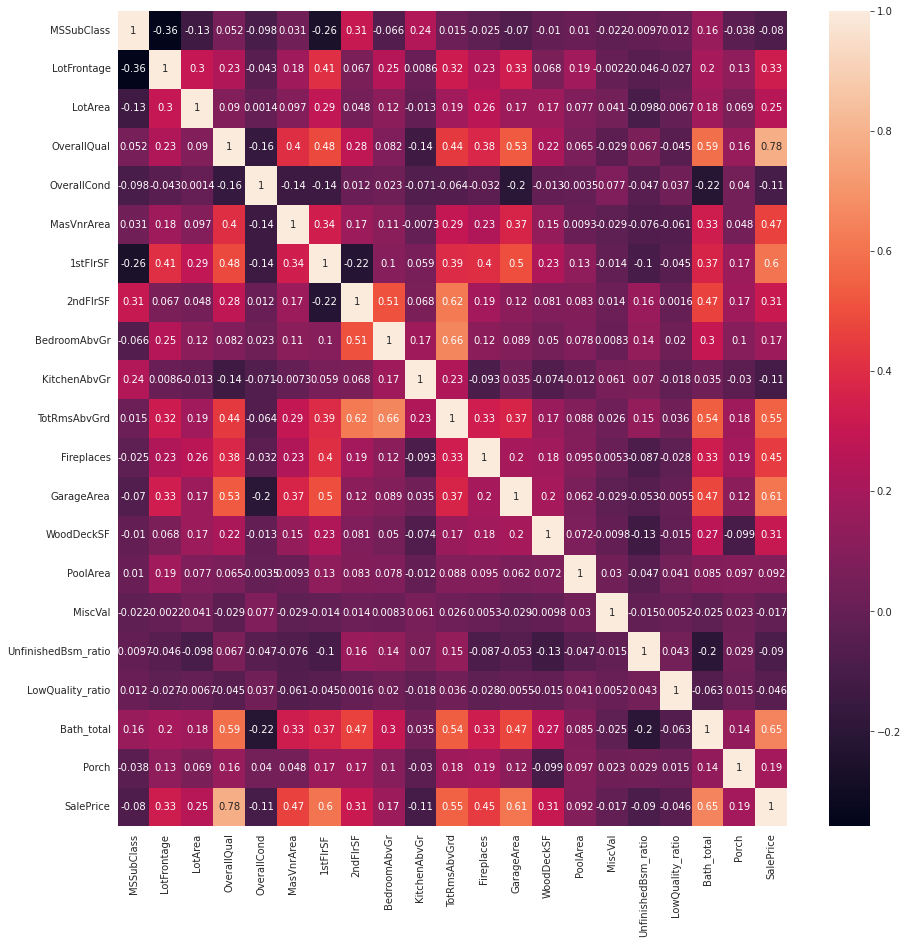

In [37]:
plt.figure(figsize = (15,15))
N = num.copy()
N.insert(len(N),'SalePrice')
sns.heatmap(train_data.loc[:, N].corr(),annot=True)

**QQ-Plot**

ln(Y)变量的正态性检验

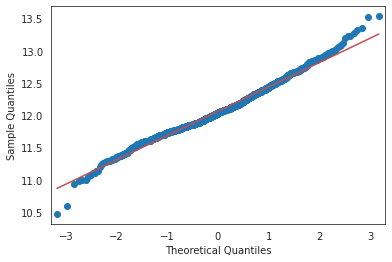

In [38]:
sm.qqplot(np.log(y_train), line = 's')
pylab.show()

In [39]:
# Standardize numerical features
stdSc = StandardScaler()
x_train.loc[:, num] = stdSc.fit_transform(x_train.loc[:, num])

离群值暂时没搞

**粗略回归**

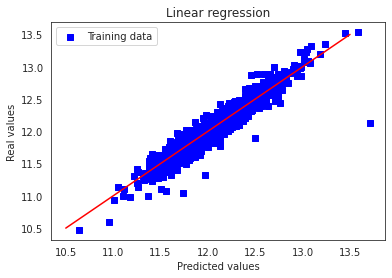

In [40]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, np.log(y_train))

# Look at predictions on training and validation set
y_train_pred = lr.predict(x_train)

# Plot predictions
plt.scatter(y_train_pred, np.log(y_train), c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [41]:
model = sm.OLS(np.log(y_train),x_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:57:28   Log-Likelihood:                 1047.9
No. Observations:                1338   AIC:                            -1846.
Df Residuals:                    1213   BIC:                            -1196.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
MSSubClass                -0

In [54]:
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by AIC
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 10000000, 10000000
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            #formula = "{} ~ {} + 1".format(response,
            #                               ' + '.join(selected + [candidate]))
            score = sm.OLS(data[response], data[selected + [candidate]]).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse = True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        print(best_new_score)
        print(len(remaining))
    #formula = "{} ~ {} + 1".format(response,
     #                              ' + '.join(selected))
    model = sm.OLS(data[response], data[selected + [candidate]]).fit()
    return model

In [55]:
try_data = pd.concat([x_train,y_train], axis = 1)
model_try = forward_selected(try_data, 'SalePrice')

33972.954854395444
153
32701.483744056608
152
32447.774492616136
151
32216.791045845726
150
32067.646625525722
149
31946.45596355095
148
31852.172108159877
147
31761.39341449484
146
31701.565620269954
145
31651.333408209208
144
31601.486707306536
143
31559.530516094866
142
31511.54859939359
141
31473.563549508424
140
31446.804847138137
139
31423.44233251116
138
31400.33060811459
137
31380.591585130343
136
31361.57969409551
135
31344.972999615627
134
31329.67578819046
133
31318.541280719255
132
31307.847386739304
131
31296.98137305488
130
31289.446590501248
129
31282.488916109156
128
31276.682705489224
127
31270.981939566565
126
31261.61679195236
125
31256.28725152038
124
31251.24377579093
123
31246.07934950251
122
31239.51943848262
121
31234.71121352477
120
31231.454882086273
119
31228.39518664431
118
31226.787988459142
117
31225.13655544964
116
31223.548585136643
115
31222.3437626602
114
31221.181402727256
113
31219.978674963386
112
31218.7669763428
111
31217.931167641684
110
31217.12

KeyboardInterrupt: 